### Convolutional Neural Network - Keras

> **CIFAR10 dataset** - The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

### Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

### Loading datasets

In [ ]:
cifar10 = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10

### Visualise one Image

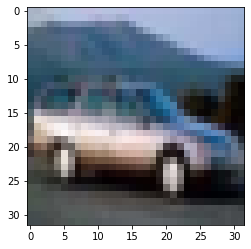

In [ ]:
plt.imshow(train_images[4], cmap=plt.cm.binary)

### Scaling
> This is one of the most important thing  to do in deep learning. Scaling the image pixels means normalisng each pixel to have  values between `0` and `1`.

In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

### Image Classes From TensorFlow

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

### Getting the shape of our images data
> We are going to get the image shape of the first images so that we will use this during the creation of our conv NN

In [ ]:
input_shape = train_images[0].shape
input_shape

(32, 32, 3)

### Model creation.

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
EPOCHS =  10
BATCH_SIZE = 4
VALIDATION_DATA = (test_images, test_labels)
history = model.fit(train_images, train_labels, epochs=EPOCHS, 
                    validation_data=VALIDATION_DATA,
                    batch_size=BATCH_SIZE
                   )

Epoch 1/10
12500/12500 [==============================] - 43s 3ms/step - loss: 0.9819 - accuracy: 0.6557 - val_loss: 1.0896 - val_accuracy: 0.6344
Epoch 2/10
12500/12500 [==============================] - 42s 3ms/step - loss: 0.9338 - accuracy: 0.6731 - val_loss: 1.0040 - val_accuracy: 0.6523
Epoch 3/10
12500/12500 [==============================] - 42s 3ms/step - loss: 0.8968 - accuracy: 0.6876 - val_loss: 1.0169 - val_accuracy: 0.6505
Epoch 4/10
12500/12500 [==============================] - 42s 3ms/step - loss: 0.8613 - accuracy: 0.6998 - val_loss: 0.9333 - val_accuracy: 0.6769
Epoch 5/10
12500/12500 [==============================] - 42s 3ms/step - loss: 0.8295 - accuracy: 0.7121 - val_loss: 0.9503 - val_accuracy: 0.6716
Epoch 6/10
12500/12500 [==============================] - 42s 3ms/step - loss: 0.8018 - accuracy: 0.7218 - val_loss: 0.9503 - val_accuracy: 0.6793
Epoch 7/10
12500/12500 [==============================] - 42s 3ms/step - loss: 0.7785 - accuracy: 0.7299 - val_loss: 0

### Summary
The model is learning okay. The validation loss is `0.9888` which is close to 1 and the actual loss during training is `0.72` which is not that bad.
> In terms of accuracy the model is `75%` accurate on the train data and `67%` accurate on the test data.

### Making some Predictions on Data.

In [ ]:
test_images[:2]

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [ ]:
predictions = model.predict([test_images[:2]])
for pred in zip(predictions, test_labels[:2]):
  i, j = pred
  index = np.argmax(i)
  print(class_names[j[-1]], "---->", class_names[index])

cat ----> cat
ship ----> ship


> Done